In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('checkins.dat', sep='|',skipinitialspace=True).dropna()

C:\Users\Factorion\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


In [4]:
len(data)

396634

In [5]:
cols = []
for i in range(0,len(data.columns)):
    cols.append(data.columns[i].strip())
data.columns = cols

In [6]:
data.columns

Index([u'id', u'user_id', u'venue_id', u'latitude', u'longitude',
       u'created_at'],
      dtype='object')

In [7]:
X = data[['latitude','longitude']]
X.head()

,latitude,longitude
2,38.895112,-77.036366
4,33.800745,-84.410520
8,45.523452,-122.676207
10,40.764462,-111.904565
11,33.448377,-112.074037


In [8]:
X = X[:100000]

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [10]:
MS = MeanShift(bandwidth=0.1)
MS.fit(X)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [11]:
labels = MS.labels_ #label каждой точки
cluster_centers = MS.cluster_centers_ #Координаты кластерных центров.

# сортировка
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_
x_plt = np.array(X)

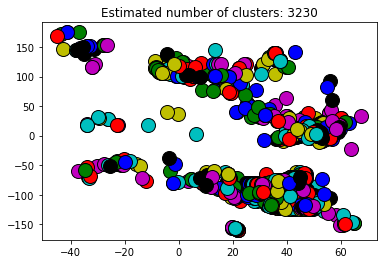

In [12]:
# графическое изображение
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(x_plt[my_members, 0], x_plt[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [13]:
# кол-во в каждом кластере
points = dict()
for i in xrange(0,len(labels)):
    if points.has_key(labels[i]):
        points[labels[i]] += 1
    else:
        points[labels[i]] = 1

In [14]:
# убирает, если < 15
for i in xrange(0,len(points)):
    if points[i]<16:
        points.pop(i)

In [15]:
# кооординаты "лучших центров"
opt_points = []
j = 0
for i in xrange(0,len(points)):
    opt_points.append(cluster_centers[i])
    
len(points)

593

In [16]:
# офисы компании
offices = [[33.751277, -118.188740],[25.867736, -80.324116],
           [51.503016, -0.075479],[52.378894, 4.885084],
           [39.366487, 117.036146],[-33.868457, 151.205134]]
offices

[[33.751277, -118.18874],
 [25.867736, -80.324116],
 [51.503016, -0.075479],
 [52.378894, 4.885084],
 [39.366487, 117.036146],
 [-33.868457, 151.205134]]

In [17]:
distance_points = []
i = 0
for opt_point in opt_points:
    min_dist = 10000000
    for office in offices:
        dist = np.sqrt((opt_point[0] - office[0])**2 + (opt_point[1] - office[1])**2)
        if dist<min_dist:
            min_dist=dist
    distance_points.append((min_dist,opt_point))

In [18]:
distance_points.sort()

In [19]:
ans = distance_points[0]
ans = np.array(ans[1])
ans[0]

-33.860630428571433

In [20]:
with open("ans.txt", "w") as f:
        f.write(str(ans[0]) + ' ' + str(ans[0]))